<a href="https://colab.research.google.com/github/x94173000/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 專題實作#01：鐵達尼號存活預測

# 環境準備

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

**讀取資料**

In [2]:
ur1 = 'https://raw.githubusercontent.com/x94173000/titanic-analysis/main/train.csv'
df = pd.read_csv(ur1)

2.請根據 Kaggle 文件瞭解 Titanic 資料中所有欄位的定義為何？

survival:存活與否

pclass:乘客的艙等，分為一至三等艙

sex:性別

Age:年齡

sibsp:手足/配偶人數

parch:父母/小孩人數

ticket:乘客船票編號

fare:乘客支付票價

cabin:客艙號碼

embarked:登船的港口，C = Cherbourg, Q = Queenstown, S = Southampton

3.進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。
（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

In [3]:
#移除缺失值等不需要的資料
df = df.dropna()

In [4]:
# 移除不需要的欄位
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
# 使用One-Hot Encoding進行編碼
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [6]:
#計算相關係數矩陣
correlation_matrix = df_encoded.corr()

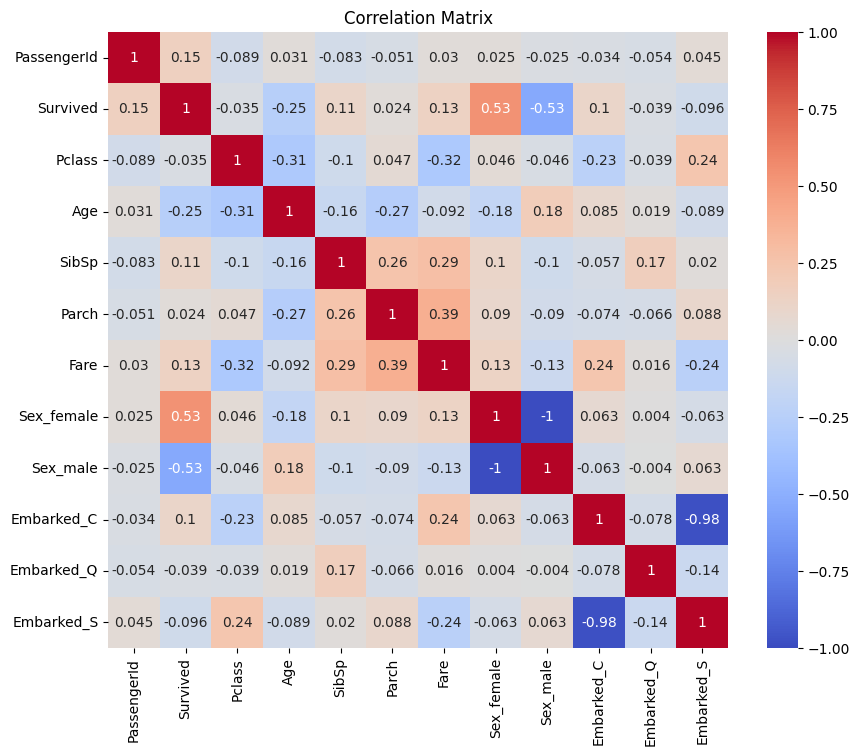

In [7]:
#繪製相關係數矩陣熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

從熱圖來看，生存率與性別成中度相關，女性生存比率越大，男性反之。

會造成上述結果是因為「婦女與孩童優先準則」*，當鐵達尼號沈船時，婦女與孩童最先登上救生艇，因此女性的存活率比男性來的高。

*參考資料:維基百科https://zh.wikipedia.org/zh-tw/%E5%A9%A6%E5%A5%B3%E8%88%87%E5%AD%A9%E7%AB%A5%E5%84%AA%E5%85%88





In [8]:
#計算特徵的相關性
survival_correlation = correlation_matrix['Survived'].sort_values(ascending=False)
print(survival_correlation)

Survived       1.000000
Sex_female     0.532418
PassengerId    0.148495
Fare           0.134241
SibSp          0.106346
Embarked_C     0.104870
Parch          0.023582
Pclass        -0.034542
Embarked_Q    -0.038544
Embarked_S    -0.095861
Age           -0.254085
Sex_male      -0.532418
Name: Survived, dtype: float64


4.承上題，請問你是如何定義與解讀什麼稱為「關係大」呢？

以相關係數來看，相關係數值介於-1到1之間，越靠近1則代表兩變數呈正相關，靠近0表示兩變數之間無明顯相關，越靠近-1則表示兩變數成負相關。

在本案例中，和生存率之間相關係數最大值為女性，最小值為男性，因此判斷性別與生存率的關係程度較大。
